In [1]:
import numpy as np

In [2]:
# x = np.linspace(0,5,5)
x = np.arange(-3.0, 3.0, 0.05)
w, b = 3, 0
y = w*x + b + np.random.randn(x.size)
# y = [ 0.21378624, 1.97217916, 2.36737375, 5.13718724, 6.26470731]

In [3]:
# The function J
def J(b, w, x, y):
    J = 0
    for i in range(len(x)):
        J += ((b + w*x[i]) - y[i] )**2
    return J/len(x)

def error(m, b, x, y):
    totalError = 0
    for i in range(0, len(x)):
        totalError += (y[i] - (m * x[i] + b)) ** 2
    return totalError / float(len(x))

In [4]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt

In [5]:
ws = np.linspace(0.0, 6.0, 10)
bs = np.linspace(-5.0, 4.0, 10)

B, W = np.meshgrid(bs, ws)
# ax.plot_surface(B, W, J(B,W,x,y))
zs = np.array([error(ws, bs, x, y) 
               for ws, bs in zip(np.ravel(W), np.ravel(B))])
Z = zs.reshape(W.shape)
# plt.show()
# plt.contour(B,W,J(B,W,x,y), colors='C0', levels=[i for i in np.arange(0,80,3.75)])

In [6]:
#### 
# Implement Gradient
w_init, b_init = 5.0, -3.0

def grad_W(m, b, x, y):
    grad_W = 0
    for i in range(len(x)):
        grad_W +=  -2*(x[i]) * (y[i] - (m * x[i] + b))
    return grad_W / float(len(x))

def grad_B(m, b, x, y):
    grad_B = 0
    for i in range(len(x)):
        grad_B +=  -2 * (y[i] - (m * x[i] + b))
    return grad_B / float(len(x))

In [7]:
err = error(w_init, b_init, x, y)
lr = 0.1
w = w_init - lr * grad_W(w_init, b_init, x, y)
b = b_init - lr * grad_B(w_init, b_init, x, y)
n_err = error(w, b, x, y)

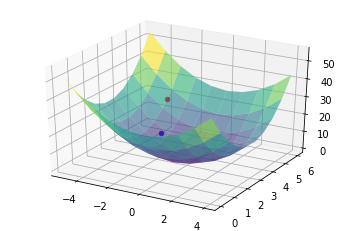

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')

ax.plot_surface(B, W, Z, cmap='viridis', edgecolor='none', alpha=0.6)
ax.scatter(b_init, w_init, err,c='red', marker = 'o', s=20 )
ax.scatter(b, w, n_err,c='blue', marker = 'o', s=20 )